In [46]:

def display8seq(vec_seq, titles=False):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    T, V, H = vec_seq[0].shape
    filled_list = [np.ones((T, V, H), dtype=np.bool) for k in range(len(vec_seq))]
    
    v_min = np.min(vec_seq)
    v_max = np.max(vec_seq)
    colors = (vec_seq-v_min)/(v_max-v_min)
    #print(colors.shape)
    colors_list = [(np.repeat(seq[:, :, :, np.newaxis], 3, axis=3)-v_min)/(v_max-v_min) for seq in vec_seq]
    #print(colors_list)
    fig, axes_arr = plt.subplots(2, 4, subplot_kw=dict(projection='3d'))
    axes = axes_arr.flatten()
    #ax = fig.gca(projection='3d')
    for ax, i in zip(axes, range(len(vec_seq))):
        ax.voxels(filled_list[i], facecolors=colors_list[i])#, edgecolors='k')
        ax.set_xlabel('T axis')
        ax.set_ylabel('V axis')
        ax.set_zlabel('H axis')
        ax.set_xticks([]) 
        ax.set_yticks([]) 
        ax.set_zticks([])
        #plt.tight_layout()

        if titles:
            ax.set_title(titles[i])

In [1]:
import numpy as np

import noise3d
from noise3d import spectrum as ns

In [85]:
#T = V = H = 100
T = 100
V = H = 100

tuple_std = (1, 2, 3, 4, 5, 6, 7)
#tuple_std = (0, 0, 0, 0, 0, 0, 1)
#tuple_std = (1, 2, 3, 4, 5, 6, 7)
print([x**2 for x in tuple_std])

seq = noise3d.genseq.genseq_3dnoise_seq(T, V, H, tuple_std)

print(np.var(seq))
print(noise3d.noise.var_netd(seq))
#print((np.mean(np.std(seq, axis=0)))**2)
print(noise3d.noise.var_ntvh(seq))
print(noise3d.noise.get_all_3d_corrected_var_matrix(seq)[0][-1])




[1, 4, 9, 16, 25, 36, 49]
139.88925566880408
90.82805042289392
47.613875413740736
48.92012788941682


In [86]:
vec_ns_meas = ns.compute_meas_psd(seq)
print(vec_ns_meas[0].shape)
print(vec_ns_meas[-1].shape)

(100, 100, 100)
(100, 100, 100)


In [87]:
vec_ns = ns.compute_psd(seq)
print(vec_ns[0].shape)
print(vec_ns[-1].shape)

(100, 100, 100)
(100, 100, 100)


In [88]:
print(ns.compute_var_m(seq))

[ 1.63056303  3.5818492  10.52616267 15.94586186 24.72946962 35.86147388
 47.61387541]


In [89]:
print(ns.compute_var(seq))

[ 1.23692844  3.09434429 10.01918283 15.77891401 24.74086459 36.09889362
 49.07134338]


In [90]:
print(noise3d.get_all_3d_corrected_var_matrix(seq))

((1.2187300289735667, 3.056250171574067, 9.910251651609737, 15.831449832352606, 24.862648792675515, 36.239251986656754, 48.92012788941682), 140.03871035325906)


In [91]:
#vec_psd = np.real(ns.compute_psd(seq))
vec_psd = ns.compute_psd(seq)

import matplotlib.pyplot as plt

psd_t = vec_psd[0]
psd_v = vec_psd[1]
psd_h = vec_psd[2]
psd_tv = vec_psd[3]
psd_th = vec_psd[4]
psd_vh = vec_psd[5]
psd_tvh = vec_psd[6]

ech_t = np.fft.fftfreq(psd_t.shape[0])
ech_v =  np.fft.fftfreq(psd_t.shape[1])
vmin = np.min(vec_psd)
vmax = np.max(vec_psd)

print(np.mean(psd_t))
print(np.mean(psd_v))
print(np.mean(psd_h))
#%matplotlib qt
#tdisplay8seq(vec_psd)

1236928.4413106535
3094344.286854697
10019182.831246218


36180294975.283844


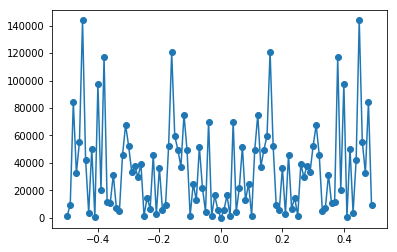

In [101]:
# Les bruits t, v, et h ont un spectre 1D, situé sur le premier échantillon
plt.figure()
#plt.plot(np.fft.fftshift(ech_t), np.fft.fftshift(psd_t[:, 0, 0]), "o-") # bruit temporel 
#plt.plot(ech_freq, ech_freq/ech_freq*np.mean(psd_t[:, 0, 0]), "*")
plt.plot(np.fft.fftshift(ech_v), np.fft.fftshift(psd_v[0, :, 0])/psd_v.size, "o-") # bruit v 
print(np.mean(np.fft.fftshift(psd_v[0, :, 0])))
#plt.plot(ech_freq, ech_freq/ech_freq*np.mean(psd_v[:, 0, 0]), "*")
#plt.plot(ech_freq, psd_h[0, 0, :], "o-") # bruit v 
#plt.plot(ech_freq, ech_freq/ech_freq*np.mean(psd_h[:, 0, 0]), "*")


In [50]:
n = 0
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(psd_h[n, :, :], vmin=vmin, vmax=vmax)
ax = fig.add_subplot(132)
ax.imshow(psd_h[:, n, :], vmin=vmin, vmax=vmax)
ax = fig.add_subplot(133)
ax.imshow(psd_h[:, :, n], vmin=vmin, vmax=vmax)

(100, 100, 100)


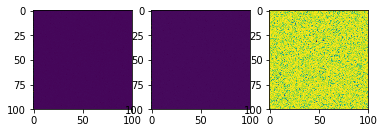

In [71]:
n = 13

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(psd_tv[n, :, :])
ax = fig.add_subplot(132)
ax.imshow(psd_tv[:, n, :])
ax = fig.add_subplot(133)
ax.imshow(psd_tv[:, :, n])

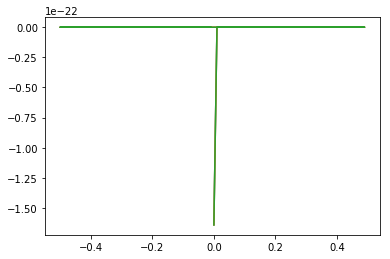

In [45]:
plt.plot(ech_freq, psd_th[:, 0, 0])
plt.plot(ech_freq, psd_th[0, :, 0])
plt.plot(ech_freq, psd_th[0, 0, :])

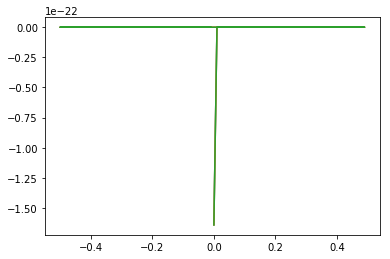

In [46]:
plt.plot(ech_freq, psd_vh[:, 0, 0])
plt.plot(ech_freq, psd_vh[0, :, 0])
plt.plot(ech_freq, psd_vh[0, 0, :])

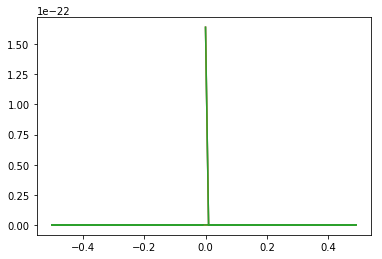

In [47]:
plt.plot(ech_freq, psd_tvh[:, 0, 0])
plt.plot(ech_freq, psd_tvh[0, :, 0])
plt.plot(ech_freq, psd_tvh[0, 0, :])